# Web Scraping Data for Time Series Predictions  
  
## Silver & Gold Prices

  
<img style="float: right;" src="https://theoptionsedge.com/wp-content/uploads/2017/04/precious-metals.jpg">  
  
---  
  
## Combined Notebook of Three Individual, Executable `*.py` Programs  
  
**By: Heather M. Steich, M.S.**  
**Date: February 24$^{th}$, 2018**  
**Written in: Python 3.4.5**  

In [1]:
import sys
print(sys.version)

3.4.5 | packaged by conda-forge | (default, Sep  8 2016, 14:36:52) [MSC v.1600 64 bit (AMD64)]


---  
  
## Initial Setup
  
This submission was created with a Jupyter Notebook.  There are no special instructions for running the code, as long as one has all the required libraries installed.  All of the utilized Python libraries and visualization templates are included in the following code block; once run successfully, the rest of the notebook should run and compile without difficulty.  Since these libraries are all open source, I've included links to the source documentation for each below.  
  

 - Data wrangling & processing:  
    - [NumPy](http://www.numpy.org/)  
    - [pandas](https://pandas.pydata.org/pandas-docs/stable/)  
    - [lxml.html](http://lxml.de/lxmlhtml.html)  
    - [Requests](https://pypi.python.org/pypi/requests)  
    - [JSON](https://docs.python.org/3/library/json.html)  
    - [datetime](https://docs.python.org/3/library/datetime.html)  
  

 - Statistical testing:
    - [statsmodels.tsa.stattools.adfuller](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)  
  

 - Machine learning:  
    - [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  
    - [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)  
  

 - Plotting:  
    - [matplotlib](https://matplotlib.org/contents.html)  
    - [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)  
    - [seaborn](https://seaborn.pydata.org/)  
    - [matplotlib.ticker.FormatStrFormatter](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.FormatStrFormatter)  
    

 - Remove warning messages:  
    - [warnings](https://docs.python.org/3.1/library/warnings.html)  
    - [warnings.filterwarnings('ignore')](https://docs.python.org/3.1/library/warnings.html#warnings.filterwarnings)  
  

Although I did not specifically reference on each plot, I did utilize [ColorBrewer2](http://colorbrewer2.org/) on several occasions when selecting colors from color palates that work well together and are color blind friendly.

In [2]:
### LOAD LIBRARIES ###


# Data wrangling & processing: 
import numpy as np
import pandas as pd
from lxml import html
import requests
import json
import datetime


# Statistical testing:
from statsmodels.tsa.stattools import adfuller


# Machine learning:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


# Remove warning messages:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### ESTABLISH PLOT FORMATTING ###


#mpl.rcdefaults()  # Resets plot defaults

def plt_format():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (16, 10)
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.markerscale'] = 4
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 1

#plt.rcParams.keys()  # Available rcParams
plt_format()

---  
  
## Actions
  
> 1. Write a program to fetch the historical prices and dates of gold and silver from these 2 URLs:  
  
>  - [https://www.investing.com/commodities/gold-historical-data](https://www.investing.com/commodities/gold-historical-data)  
  
>  - https://www.investing.com/commodities/silver-historical-data  
  
>  and store them locally.  
  
> (Extract the default data range in each case: no need to interact with the UI elements.)

In [4]:
### FETCH HISTORICAL DATA ###


## FUNCTION
# Define a function to fetch the historical data:
def fetchHistoricalPrices(u_a, extensions):
    
    # Name an empty dictionary to hold the data:
    nested_dict = {}
    
    # Scrape both websites:
    for product, ext in extensions.items():

        # Specify the url:
        url = 'https://www.investing.com' + ext

        # Access the website to request content:
        site = requests.get(url=url, headers=u_a)

        # Parse the HTML content:
        elem = html.fromstring(site.content)

        # Specify the XPath for the date element:
        dates = elem.xpath('//*[@id="curr_table"]/tbody/tr/td[1]/text()')

        # Specify the XPath for the price element:
        prices = elem.xpath('//*[@id="curr_table"]/tbody/tr/td[2]/text()')

        # Specify the product:
        nested_dict[product] = {}
        
        # Add the dates & prices as key-value pairs:
        nested_dict[product] = dict(zip(dates, prices))
    
    # The function returns the nested dictionary:
    return(nested_dict)




## PARAMETERS
# Declare a User-Agent to prevent "<Response [403]>" error & access the data:
u_a = {"User-Agent": "This is a web-scraping program. For questions, please contact heathersteich@gmail.com."}

# Create a dictionary with the product & extension for each website:
extensions = {'gold': '/commodities/gold-historical-data', 
              'silver': '/commodities/silver-historical-data'}




## EXECUTE FUNCTION
# Run the function, with parameters specified:
data = fetchHistoricalPrices(u_a, extensions)




## EXPORT DATA TO FILE
# Create an empty *.JSON file with 'write' privileges:
with open("historical.json", "w") as file:
    
    # Dump the nested dictionary to the file:
    json.dump(data, file)
    
    # Update the user:
    print('Created file: ', file.name, 
          '\n. . .'
          '\nExecution complete.')

Created file:  historical.json 
. . .
Execution complete.


In [5]:
### VALIDATE SOLUTION ###  


# Read & print the data as a Pandas DataFrame:
df = pd.read_json(file.name).rename_axis('date').reset_index().sort_values('date')
df

,date,gold,silver
20,2018-01-23,"1,341.70",17.050
21,2018-01-24,"1,361.40",17.515
22,2018-01-25,"1,368.00",17.305
23,2018-01-26,"1,357.20",17.385
24,2018-01-28,NaN,17.410
25,2018-01-29,"1,345.10",17.155
26,2018-01-30,"1,340.00",17.105
27,2018-01-31,"1,343.10",17.345
0,2018-02-01,"1,347.90",17.180
1,2018-02-02,"1,337.30",16.555


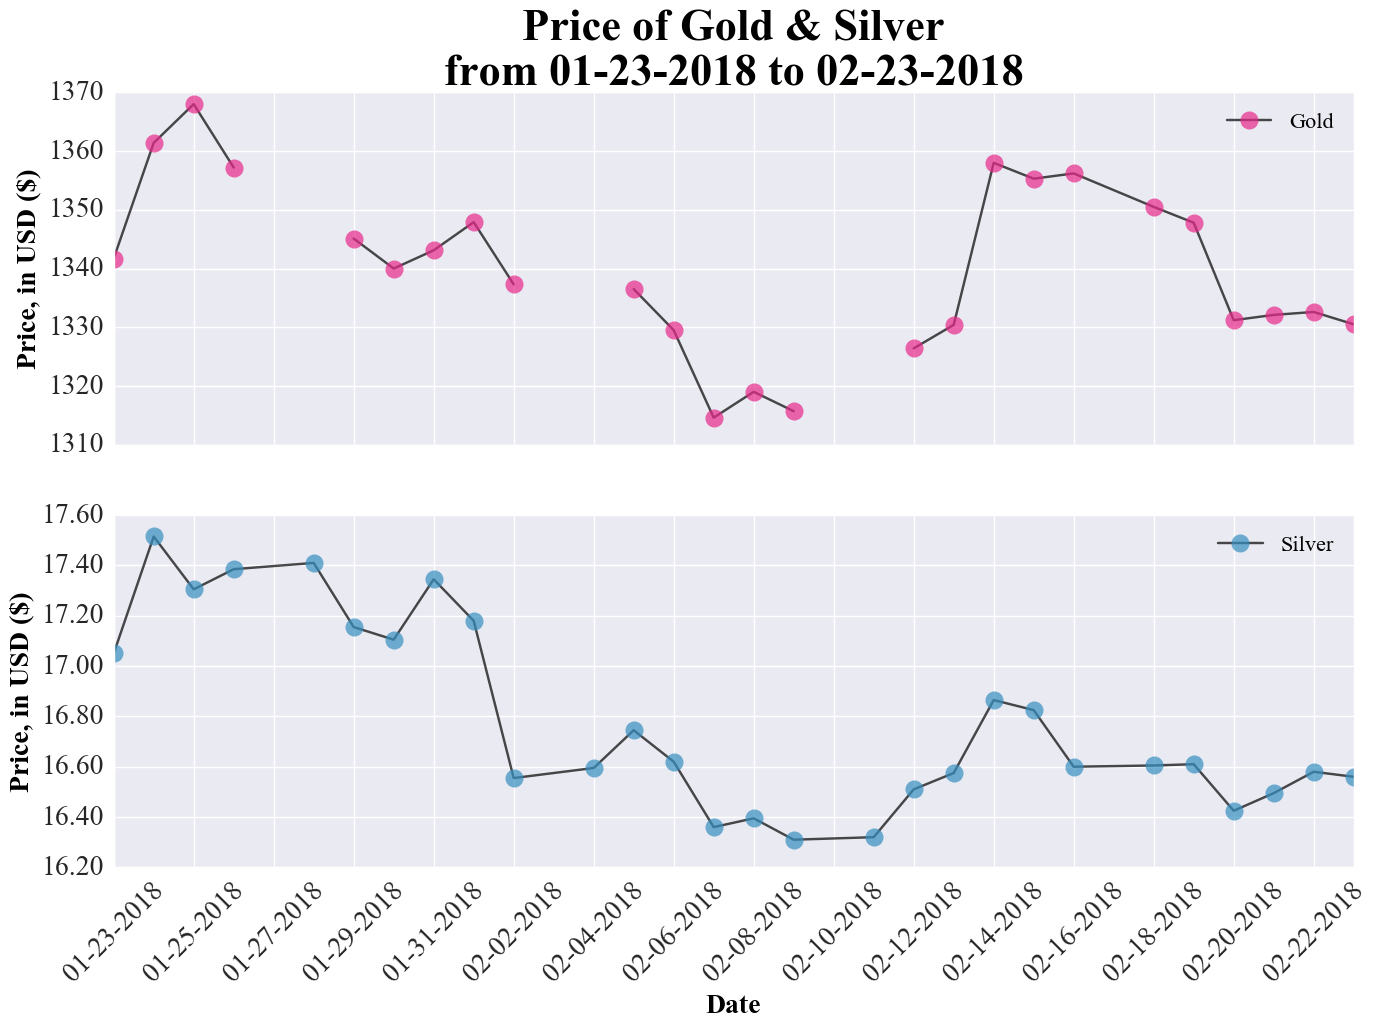

In [6]:
### VISUALIZE THE DATA ###


## PLOTTING
# Load pre-specified plot format:
plt_format()

# Create two subplots, since the prices are very different, but the dates are the same:
fig, ax = plt.subplots(2, sharex=True)

# The gold plot:
ax[0].plot(df.date, pd.to_numeric(df.gold.str.replace(',', ''), errors='coerce'), 
           color='k', linestyle='-', marker='o', markersize=13, 
           markerfacecolor='#e7298a', alpha=0.7, label='Gold')
ax[0].set_title('Price of Gold & Silver\nfrom %s to %s' 
                %(df.date.min().strftime('%m-%d-%Y'), df.date.max().strftime('%m-%d-%Y')))
ax[0].set_ylabel('Price, in USD ($)')
ax[0].legend(markerscale=1)


# The silver plot:
ax[1].plot(df.date, df.silver, 
           color='k', linestyle='-', marker='o', markersize=13, 
           markerfacecolor='#3690c0', alpha=0.7, label='Silver')
plt.xticks(pd.date_range(df.date.min(), df.date.max(), freq='2D'), 
           pd.date_range(df.date.min(), df.date.max(), freq='2D').strftime('%m-%d-%Y'), 
           rotation=45)
ax[1].set_xlabel('Date')
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].set_ylabel('Price, in USD ($)')
ax[1].legend(markerscale=1);

---  
    

> 1. **Complete**   
  
> 2. Write a second program that takes the following 3 command line arguments:  
  
>  - Start date (in the format 2017-05-10)

>  - End date (in the format 2017-05-22)

>  - Commodity type (either "gold" or silver”)

>  and then returns (via the locally stored data) the mean and variance of the commodity’s price over the specified date range.  
  
> For example, the program might be called like so:  
  
> `In []:   ./getCommodityPrice 2017-05-01 2017-05-03 gold`  
  
> and would print out a tuple such as:  
  
> `Out []:   gold 1253.66 35.79`  

In [7]:
### CREATING AN IN-NOTEBOOK COMMAND PROMPT ###  


## RUNNING THIS BLOCK CREATES AN INTERACTIVE COMMAND PROMPT 
## AT THE BOTTOM, IN ORDER TO SPECIFY DATES & COMMODITY


# Read in the data as a Pandas DataFrame:
df = pd.read_json('./historical.json').reset_index()


# Correct column names:
df.columns = ['date', 'gold', 'silver']


# Correct data types, 'if' needed:
if df.date.dtype != 'datetime64[ns]':
    df.date = df.date.astype('datetime64[ns]')
if df.gold.dtype != 'float64':
    df.gold = df.gold.str.replace(',', '').astype('float')
if df.silver.dtype != 'float64':
    df.silver = df.silver.str.replace(',', '').astype('float')

    
# Check if the user specified arguments:
args = len(sys.argv) - 1


# Define start date:
if args == 3:
    # Use provided start date:
    print('Valid start dates are between %s and %s.' 
        %(df.date.min().strftime('%Y-%m-%d'), 
        df.date.max().strftime('%Y-%m-%d')))
    start = sys.argv[1]
else:    
    # Collect a start date:
    start = input('Please give a start date between %s and %s:\n> ' 
        %(df.date.min().strftime('%Y-%m-%d'), 
        df.date.max().strftime('%Y-%m-%d')))

        
# Validate that the start date is in range:
def validate_start(start):
    try:
        datetime.datetime.strptime(start, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD.")
    if start in pd.date_range(df.date.min().strftime('%Y-%m-%d'), 
        df.date.max().strftime('%Y-%m-%d')):
        print('Start date:  ', start, '\n')
    else:             
        print('\nPlease provide a date within the specified range.')
        start = input('> ')
        validate_start(start)    
    return start
    
    
# Record validated start date:
start = validate_start(start)


# Define end date:
if args == 3:
    # Use provided end date:
    print('Valid end dates are between %s and %s.' 
        %(start, df.date.max().strftime('%Y-%m-%d')))
    end = sys.argv[2]
else:    
    # Collect an end date:     
    end = input('Please give an end date between %s and %s:\n> ' 
    %(start, df.date.max().strftime('%Y-%m-%d')))

    
# Validate that the end date is in range:
def validate_end(end):
    try:
        datetime.datetime.strptime(end, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD.")
    if end in pd.date_range(start, df.date.max().strftime('%Y-%m-%d')):
        print('End date:    ', end, '\n')
    else:
        print('\nPlease provide a date within the specified range.')
        end = input('> ')
        validate_end(end)
    return end

    
# Record validated end date:
end = validate_end(end)


# Define commodity:
if args == 3:
    # Use provided commodity:
    print('Valid commodities are either %s or %s.' 
        %(df.columns[1], df.columns[2]))
    commodity = sys.argv[3]
else:    
    # Collect a commodity:
    commodity = input('Please give a commodity, either %s or %s:\n> ' 
    %(df.columns[1], df.columns[2]))

    
# Verify that the commodity is valid:
def validate_commodity(commodity):
    if (commodity == df.columns[1]) | (commodity == df.columns[2]):
        print('Commodity:   ', commodity, '\n')
    else:
        print("\nPlease provide a correct input, should be 'gold' or 'silver'.")
        commodity = input('> ')
        validate_commodity(commodity)
    return commodity  
 

# Record validated commodity: 
commodity = validate_commodity(commodity)


# Calculate the commodity's price mean & variance over the date range:
date_range = pd.date_range(start, end)
df_range = df[df.loc[:, 'date'].isin(date_range)]
mean_price = '{:.2f}'.format(np.mean(
    df_range.loc[:, commodity].dropna()))
price_var = '{:.2f}'.format(np.var(
    df_range.loc[:, commodity].dropna()))

    
# Print the results as a tuple:
print('Out[]: ', commodity, mean_price, price_var)

Please give a start date between 2018-01-23 and 2018-02-23:
> 2018-01-30
Start date:   2018-01-30 

Please give an end date between 2018-01-30 and 2018-02-23:
> 2018-02-12
End date:     2018-02-12 

Please give a commodity, either gold or silver:
> gold
Commodity:    gold 

Out[]:  gold 1331.00 125.34


---  
    
> 1. **Complete**   
  
> 2. **Complete**  
  
> 3. Lastly, write a program to help decide if the previous gold or silver prices are good predictors for their future prices.  
  
>  Also do the same to check if an increase or decrease in the price is predictable. (There is no need to do the actual prediction.)  

**Notes about my answer:**  
  
I made some assumptions about this question.  
  
 - I'm assuming that I should use the data I scraped in the first program and used again in the second program.  However, it isn't specified if I was supposed to do a more in-depth data pull first or use data from some other source.  
  
 - *"Good predictors for future"*: This could be interpreted as statistical likelihood, confidence intervals, statistical test results, modeling results, and more.  Since this is meant to be a brief exercise, I will look at some stationarity testing and rolling mean plots as a gauge for moving forward.  
  
 - I ended up using linear regression to do a walk-forward approach, meaning that I only made the testing prediction one data point at a time, retraining the model in between predictions.  Since there was so little data to work with, missing data, plus erratic fluctuations I chose a very simple model with basic modelling calculations of Mean Squared Error (MSE) and R$^2$ to evaluate model performance.  
  
 - Since there is no specification of **good** values, I just picked arbitrary cut-off values for MSE to be under and R$^2$ to be over.  With more information about the confidence, I would have picked these values more carefully.
  
 - I did not invest the time in investigating a full time series analysis for this data.  It wasn't because I was ignoring that workload, but the statement *"no need to do the actual prediction"* combined with the fact that this is barely one month's worth of data not to find a \$10K solution to a problem with a \$5 budget.  
   
 - *"Check **if** an increase or decrease in the price is predictable"*: Of course it **is** predictable, but that doesn't mean that there is much, if any, credibility to the prediction.  One could flip a coin and make a prediction based on where it lands.  Since there was no specification about confidence in the prediction, I just used the MSE and R$^2$ values and respective boundary guidelines from the first part of the question.  I admit that this isn't an extremely robust way to answer this question, but without the specificity in the question, I didn't want to make a completely exhaustive search for the answer.  
  
As a general thought and rule, this isn't that much data history to project very confidently to the future.  I would love to look at more data to make a more conclusive answer.

In [8]:
## PREPARE DATA FOR ANALYSES ###

# Read & print the data as a Pandas DataFrame:
ts = pd.read_json(file.name).rename_axis('date').sort_index()


# Correct data types, 'if' needed:
if ts.gold.dtype != 'float64':
    ts.gold = ts.gold.str.replace(',', '').astype('float')
if ts.silver.dtype != 'float64':
    ts.silver = ts.silver.str.replace(',', '').astype('float')

In [9]:
### RUN A STATIONALITY TEST ###


# Dickey-Fuller test:
def dft(timeseries):
    #Determining the rolling mean:
    rolmean = timeseries.rolling(center=False, window=3).mean()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'% key] = value
    print(dfoutput)

    
# Print the test results:
print('GOLD STATIONARITY TEST:')
dft(ts.gold.dropna())

print('\n\nSILVER STATIONARITY TEST:')
dft(ts.silver.dropna())

GOLD STATIONARITY TEST:
Results of Dickey-Fuller Test:
Test Statistic                 -2.304306
p-value                         0.170583
#Lags Used                      8.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (10%)           -2.673893
Critical Value (5%)            -3.068498
dtype: float64


SILVER STATIONARITY TEST:
Results of Dickey-Fuller Test:
Test Statistic                 -1.471057
p-value                         0.547778
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
Critical Value (5%)            -2.976430
dtype: float64


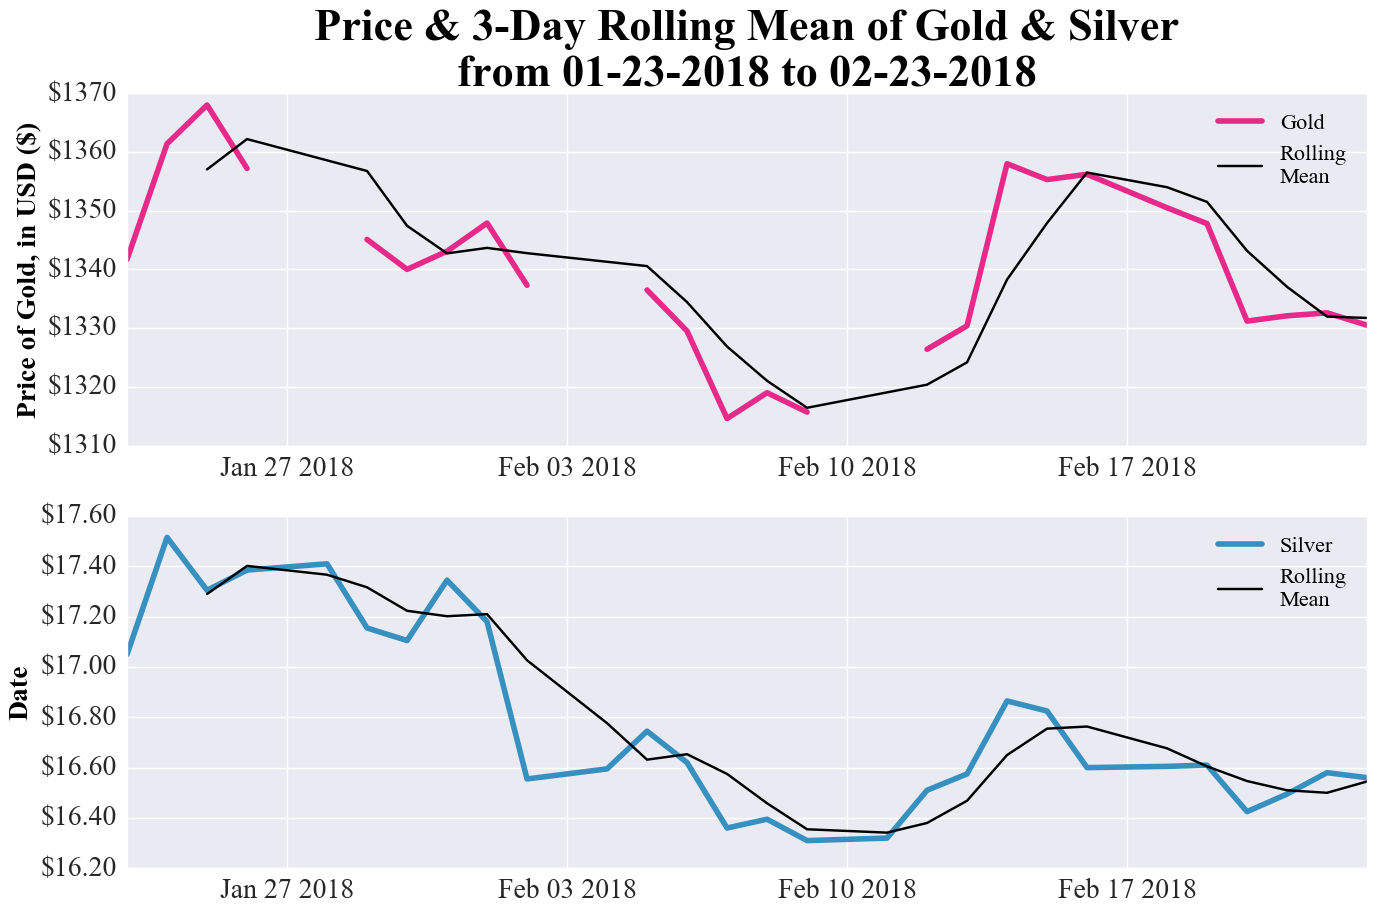

In [10]:
### VISUALIZE THE ROLLING MEAN ###


## PLOTTING
# Load pre-specified plot format:
plt_format()


# Create two subplots, since the prices are very different, but the dates are the same:
fig, (ax[0], ax[1]) = plt.subplots(2)


# The gold plot:
ax[0].plot(ts.gold, color='#e7298a', linewidth=4, label='Gold')
ax[0].plot(ts.gold.dropna().rolling(center=False, window=3).mean(), color='k', label='Rolling\nMean')
ax[0].set_title('Price & 3-Day Rolling Mean of Gold & Silver\nfrom %s to %s' 
                %(df.date.min().strftime('%m-%d-%Y'), df.date.max().strftime('%m-%d-%Y')))
ax[0].set_ylabel('Price of Gold, in USD ($)')
ax[0].yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
ax[0].legend()


# The silver plot:
ax[1].plot(ts.silver, color='#3690c0', linewidth=4, label='Silver')
ax[1].plot(ts.silver.dropna().rolling(center=False, window=3).mean(), color='k', label='Rolling\nMean')
ax[1].set_ylabel('Date')
ax[1].yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
ax[1].legend();

In [11]:
### SPLIT THE DATA INTO TRAINING & TESTING SETS ###


# Create a column to predict upon; predict the next day's price:
ts['gold_y'] = ts.gold.shift(-1)
ts['silver_y'] = ts.silver.shift(-1)


# Split the data into 80% training & 20% testing sets:
train = ts.iloc[:int(ts.shape[0] * 0.8), ]
test = ts[~ts.index.isin(train.index)]

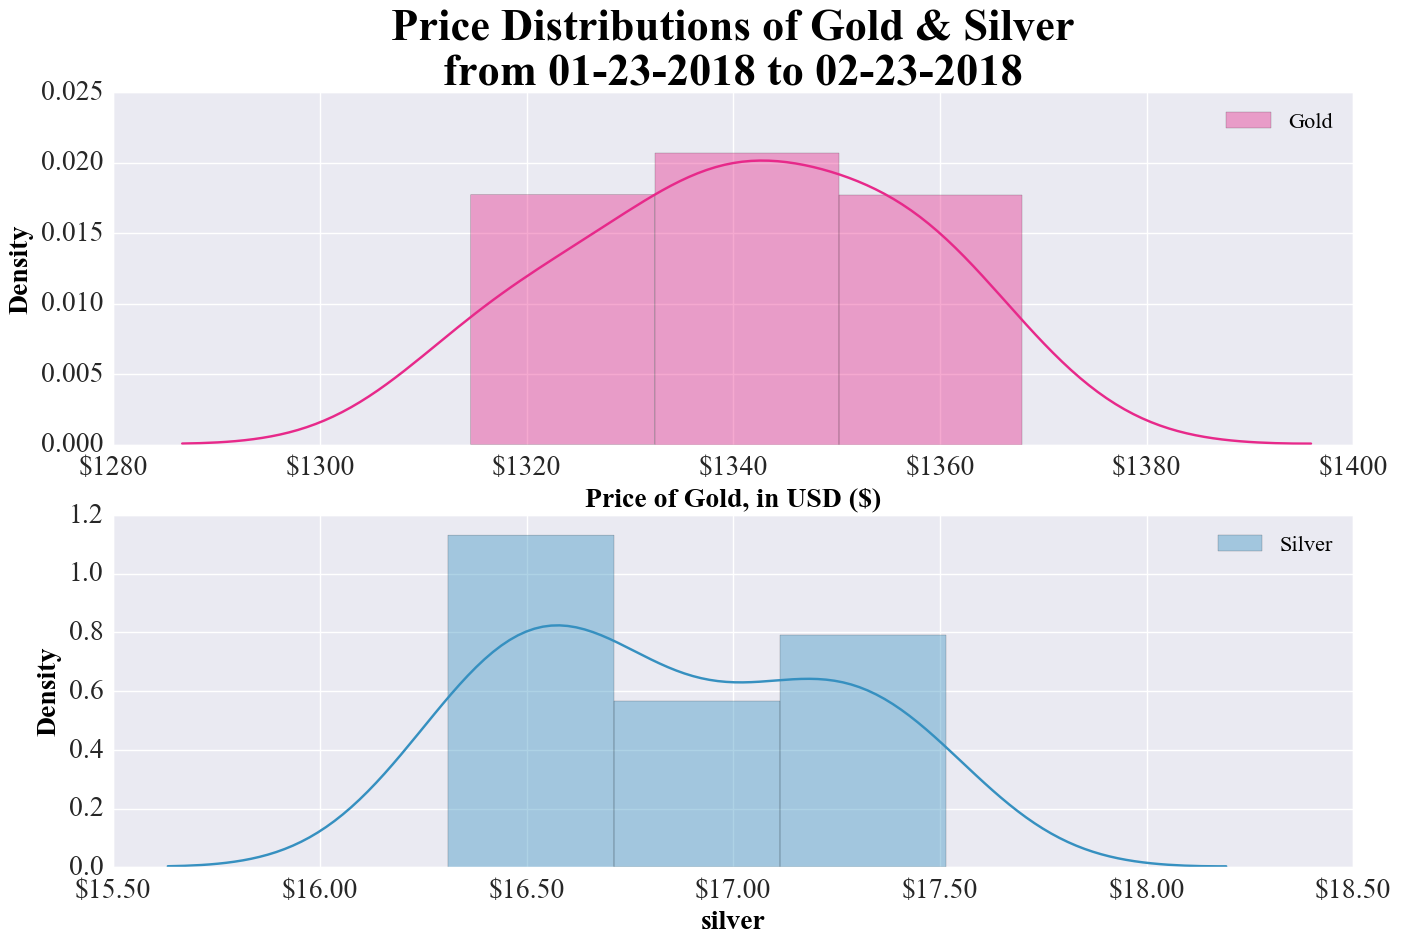

In [12]:
### VISUALIZE THE TRAINING DISTRIBUTIONS ###


## PLOTTING
# Load pre-specified plot format:
plt_format()

# Create two subplots, since the prices are very different, but the dates are the same:
fig, (ax[0], ax[1]) = plt.subplots(2)


# The gold plot:
sns.distplot(train['gold'].dropna(), ax=ax[0], color='#e7298a', label='Gold')
ax[0].set_title('Price Distributions of Gold & Silver\nfrom %s to %s' 
                %(df.date.min().strftime('%m-%d-%Y'), df.date.max().strftime('%m-%d-%Y')))
ax[0].set_xlabel('Price of Gold, in USD ($)')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
ax[0].set_ylabel('Density')
ax[0].legend()


# The silver plot:
sns.distplot(train['silver'].dropna(), ax=ax[1], color='#3690c0', label='Silver')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
ax[1].set_ylabel('Density')
ax[1].legend();


	There is no training data for Saturdays!




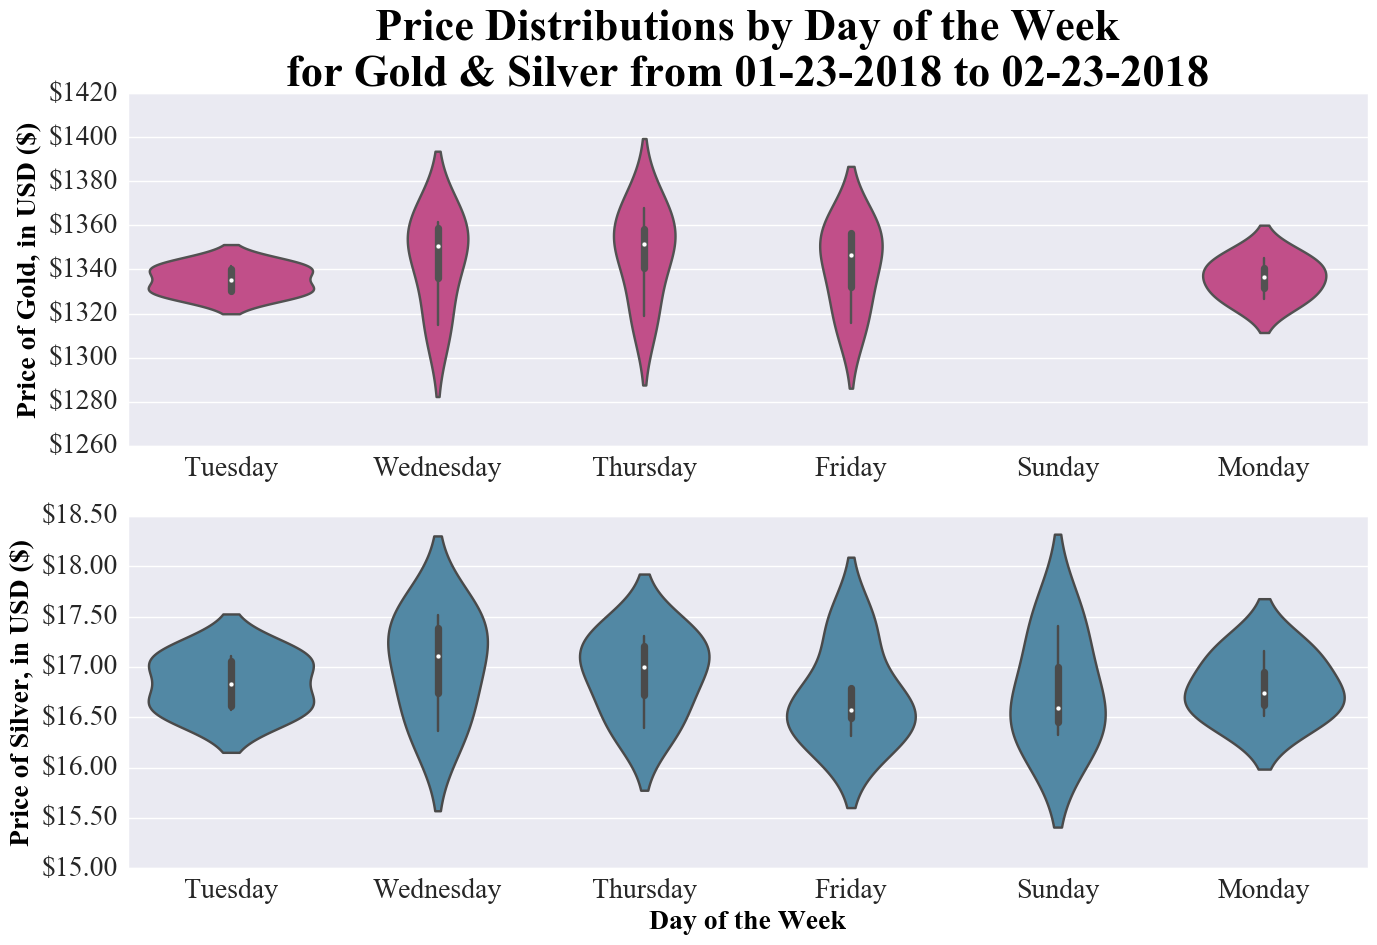

In [13]:
### VISUALIZE THE DAYS OF THE WEEK ###


# Insert the day of the week to training data:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
nums =  train.index.dayofweek
train['day'] = list(map(days.get, nums))
print('\n\tThere is no training data for Saturdays!\n\n')


## PLOTTING
# Load pre-specified plot format:
plt_format()

# Create two subplots, since the prices are very different, but the dates are the same:
fig, (ax[0], ax[1]) = plt.subplots(2)


# The gold plot:
sns.violinplot(train.day, train.gold, ax=ax[0], color='#e7298a', saturation=0.6);
ax[0].set_title('Price Distributions by Day of the Week\nfor Gold & Silver from %s to %s' 
                %(df.date.min().strftime('%m-%d-%Y'), df.date.max().strftime('%m-%d-%Y')))
ax[0].set_xlabel('')
ax[0].set_ylabel('Price of Gold, in USD ($)')
ax[0].yaxis.set_major_formatter(FormatStrFormatter('$%.0f'));


# The silver plot:
sns.violinplot(train.day, train.silver, ax=ax[1], color='#3690c0', saturation=0.6)
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Price of Silver, in USD ($)')
ax[1].yaxis.set_major_formatter(FormatStrFormatter('$%.2f'));

In [14]:
### LINEAR REGRESSION MODELING ###


# Separate the training & test data from the other commodity:
t = train[['gold', 'gold_y']].dropna()
te = test[['gold', 'gold_y']].dropna().append(test[['gold', 'gold_y']].iloc[-1, :])


# Define training input & output arrays:
X = t.iloc[:, 0].values.reshape(-1, 1)
y = t.iloc[:, 1]


# Define testing input & output arrays:
x_test = te.iloc[:, 0].values.reshape(-1, 1)
y_test = te.iloc[:, 1]


# Create empty lists to hold model data:
y_pred = []
y_true = []


# Define model type:
model = LinearRegression(normalize=True)


## WALK FORWARD METHOD:
# Walk through the testing data points, predicting 
# only one day ahead at a time:
for i in range(test.shape[0]):

    
    # Fit the model on training data:
    model.fit(X, y)
    
    
    # Run the first prediction off of the last known data point:
    if i == 0:
        training_predicts = model.predict(X)
        y_pred.append(model.predict(X[-1][0]))
        y_true.append(x_test[i])
    
    
    # Run the other predictions off of the subsequent points:
    else:
        y_pred.append(model.predict(x_test[i][0]))
        y_true.append(x_test[i])
    
    
    # Update the training set with the new, 'known' point:
    X = np.append(X, te.iloc[i, 0]).reshape(-1, 1)
    y = np.append(y, te.iloc[i, 1])
        

# Calculate the mean squared error and R^2 values:
MSE = mean_squared_error(y_pred, y_true)
R2 = model.score(y_pred, y_true)


# Print model scores:
print('Mean Squared Error: %.3f' % MSE)
print('R-square value:     %.3f' % R2)


# Make some arbitrary cut-off points for MSE & R^2, print results:
if (MSE < 5) & (R2 > 0.8):
    print('\nOne-day-ahead prediction is possible!')
else:
    print('\nOne-day-ahead prediction is not reliable!')

Mean Squared Error: 4.349
R-square value:     0.931

One-day-ahead prediction is possible!


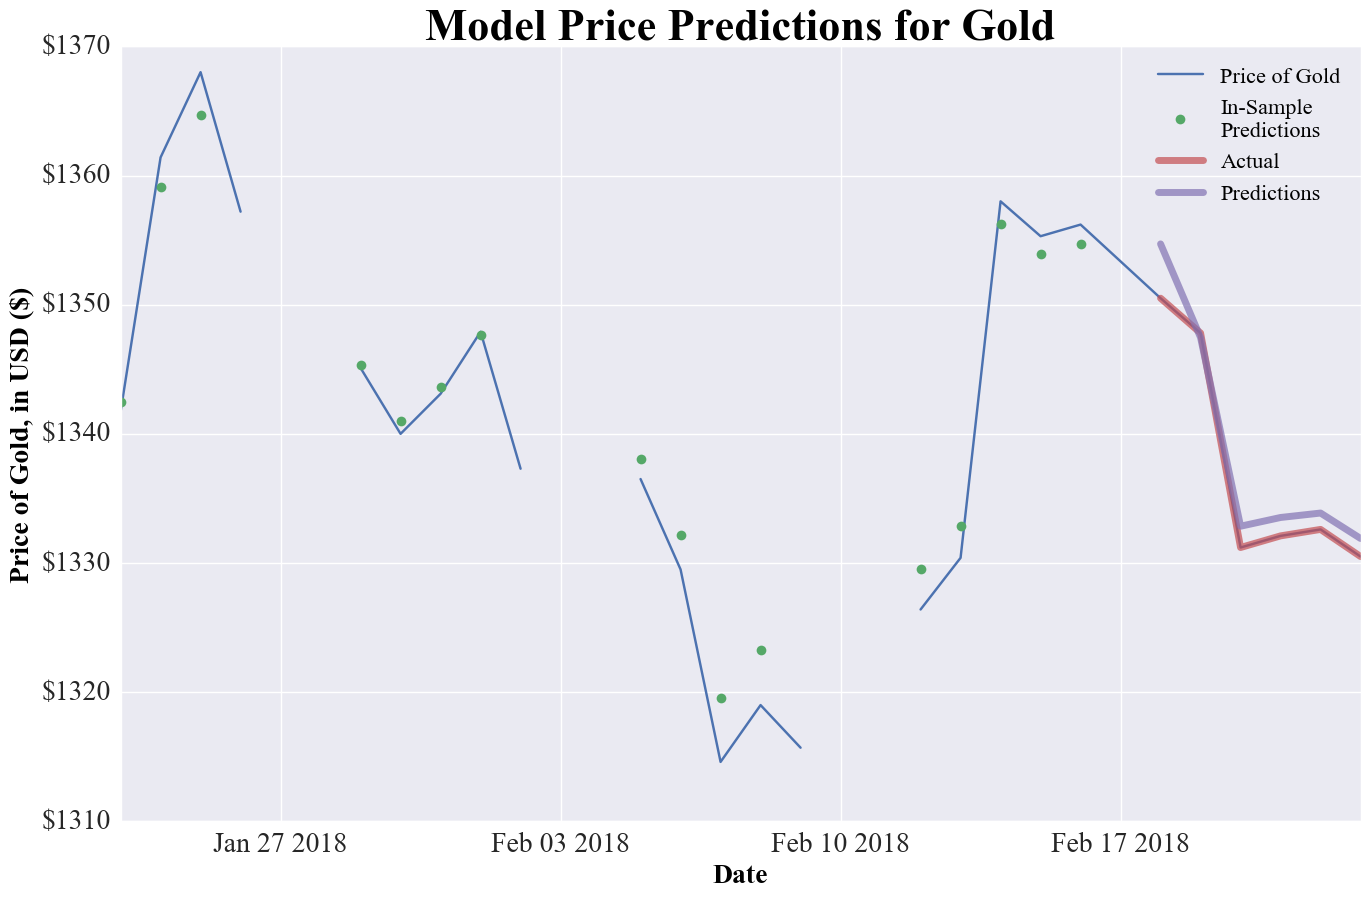

In [15]:
### VISUALIZE THE DAYS OF THE WEEK ###


## PLOTTING
# Load pre-specified plot format:
plt_format()


# Plot the model input & output values:
commodity = 'gold'
plt.plot(ts[commodity], label='Price of %s' % commodity.title())
plt.plot(t[commodity].dropna().index, training_predicts, 'o', label='In-Sample\nPredictions')
plt.plot(test.index, y_true, linewidth=5, alpha=0.7, label='Actual')
plt.plot(test.index, y_pred, linewidth=5, alpha=0.7, label='Predictions') 

plt.title('Model Price Predictions for %s' % commodity.title())
plt.xlabel('Date')
plt.ylabel('Price of %s, in USD ($)' % commodity.title())
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.legend(markerscale=1);

In [16]:
### CHECK IF AN INCREASE OR DECREASE IS PREDICTABLE ###

if model.predict(test[commodity][-1]) > test[commodity][-1]:
    print("Tomorrow's prediction is an increase.")
else:
    print("Tomorrow's prediction is a decrease.")

Tomorrow's prediction is an increase.


In [17]:
### LINEAR REGRESSION MODELING ###


# Separate the training & test data from the other commodity:
t = train[['silver', 'silver_y']].dropna()
te = test[['silver', 'silver_y']].dropna().append(test[['silver', 'silver_y']].iloc[-1, :])


# Define training input & output arrays:
X = t.iloc[:, 0].values.reshape(-1, 1)
y = t.iloc[:, 1]


# Define testing input & output arrays:
x_test = te.iloc[:, 0].values.reshape(-1, 1)
y_test = te.iloc[:, 1]


# Create empty lists to hold model data:
y_pred = []
y_true = []


# Define model type:
model = LinearRegression(normalize=True)


## WALK FORWARD METHOD:
# Walk through the testing data points, predicting 
# only one day ahead at a time:
for i in range(test.shape[0]):

    
    # Fit the model on training data:
    model.fit(X, y)
    
    
    # Run the first prediction off of the last known data point:
    if i == 0:
        training_predicts = model.predict(X)
        y_pred.append(model.predict(X[-1][0]))
        y_true.append(x_test[i])
    
    
    # Run the other predictions off of the subsequent points:
    else:
        y_pred.append(model.predict(x_test[i][0]))
        y_true.append(x_test[i])
    
    
    # Update the training set with the new, 'known' point:
    X = np.append(X, te.iloc[i, 0]).reshape(-1, 1)
    y = np.append(y, te.iloc[i, 1])
        

# Calculate the mean squared error and R^2 values:
MSE = mean_squared_error(y_pred, y_true)
R2 = model.score(y_pred, y_true)


# Print model scores:
print('Mean Squared Error: %.3f' % MSE)
print('R-square value:     %.3f' % R2)


# Make some arbitrary cut-off points for MSE & R^2, print results:
if (MSE < 2) & (R2 > 0.8):
    print('\nOne-day-ahead prediction is possible!')
else:
    print('\nOne-day-ahead prediction is not reliable!')

Mean Squared Error: 0.001
R-square value:     0.588

One-day-ahead prediction is not reliable!


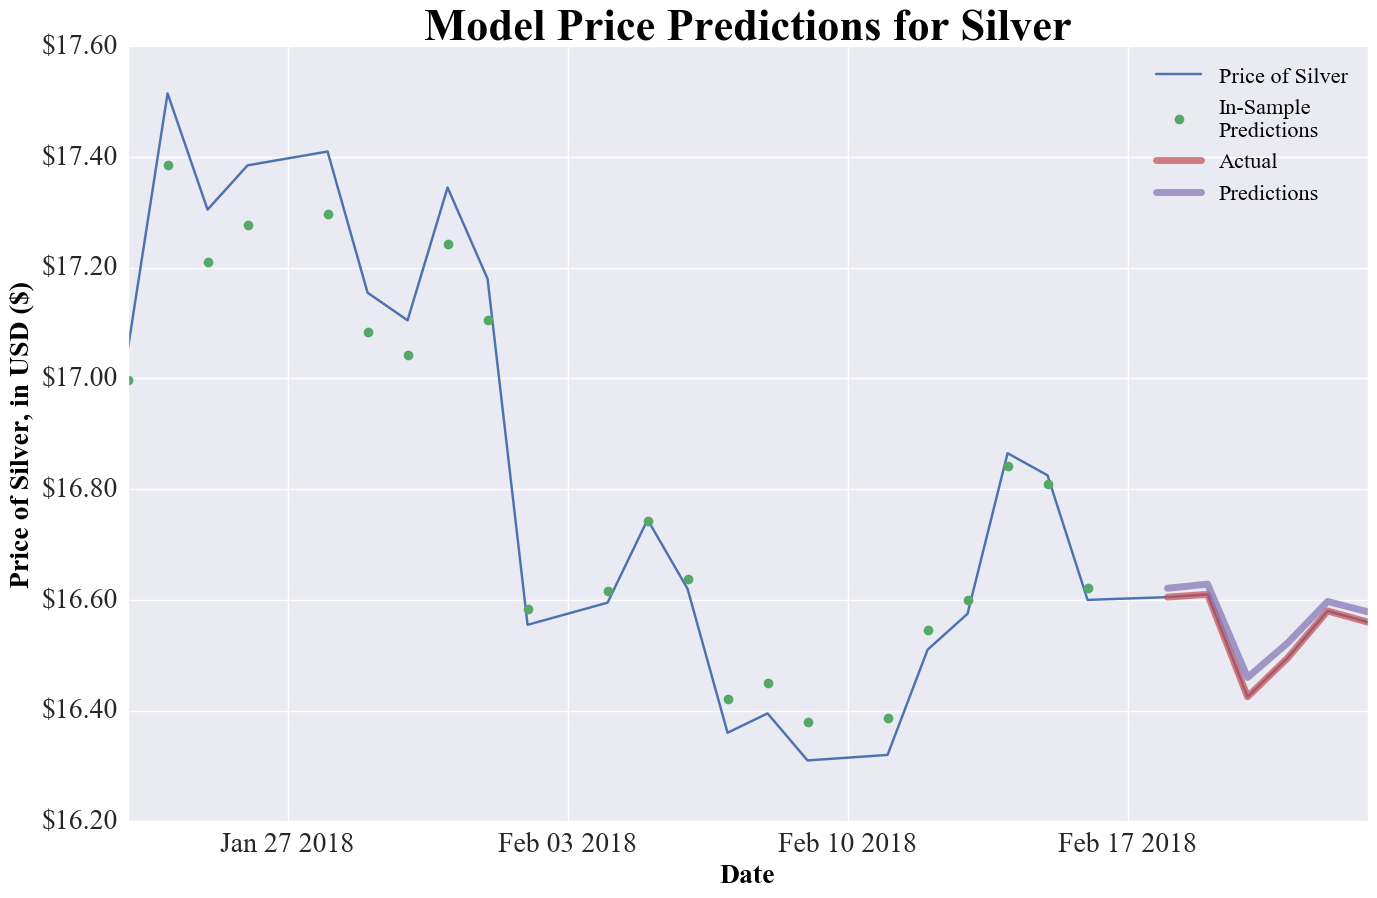

In [18]:
### VISUALIZE THE DAYS OF THE WEEK ###


## PLOTTING
# Load pre-specified plot format:
plt_format()


# Plot the model input & output values:
commodity = 'silver'
plt.plot(ts[commodity], label='Price of %s' % commodity.title())
plt.plot(t[commodity].dropna().index, training_predicts, 'o', label='In-Sample\nPredictions')
plt.plot(test.index, y_true, linewidth=5, alpha=0.7, label='Actual')
plt.plot(test.index, y_pred, linewidth=5, alpha=0.7, label='Predictions') 

plt.title('Model Price Predictions for %s' % commodity.title())
plt.xlabel('Date')
plt.ylabel('Price of %s, in USD ($)' % commodity.title())
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
plt.legend(markerscale=1);

In [19]:
### CHECK IF AN INCREASE OR DECREASE IS PREDICTABLE ###

if model.predict(test[commodity][-1]) > test[commodity][-1]:
    print("Tomorrow's prediction is an increase.")
else:
    print("Tomorrow's prediction is a decrease.")

Tomorrow's prediction is an increase.


---  
    
> 1. **Complete**   
  
> 2. **Complete**  
  
> 3. **Complete**  